## Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re

In [2]:
# Loading Dataset

df = pd.read_csv("data/emotion_dataset_raw.csv")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


### Initial Data Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [4]:
df.describe()

,Emotion,Text
count,34792,34792
unique,8,31110
top,joy,Yes .
freq,11045,76


In [6]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [7]:
# Checking duplicates
df.duplicated().sum()

np.int64(3630)

In [8]:
df.shape

(34792, 2)

In [10]:
# Removing Duplicates
df = df.drop_duplicates()

In [11]:
df.shape

(31162, 2)

In [12]:
df['Emotion'].value_counts()

Emotion
joy         10464
sadness      6175
fear         4266
surprise     4015
anger        3777
neutral      1466
disgust       855
shame         144
Name: count, dtype: int64

#### Class Distribution

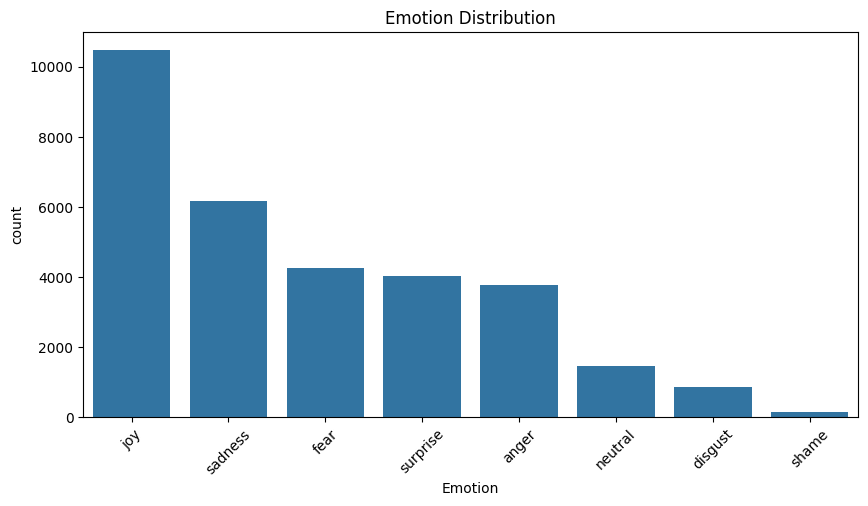

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Emotion', order=df['Emotion'].value_counts().index)
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()


### Text length Distribution


Text(0.5, 1.0, 'Distribution of Text Lengths (Word Count)')

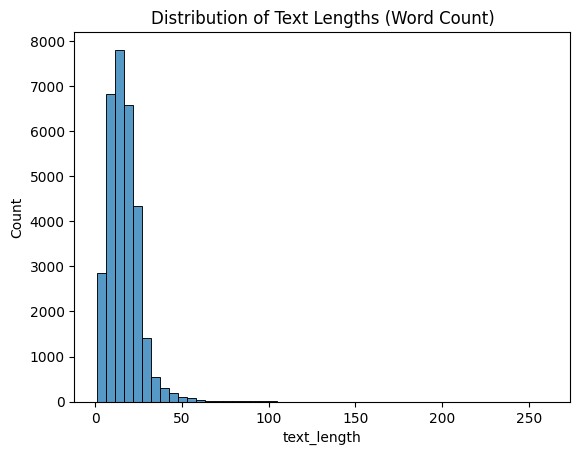

In [14]:
df['text_length'] = df['Text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Text Lengths (Word Count)")


### Most Common Words Per Emotion

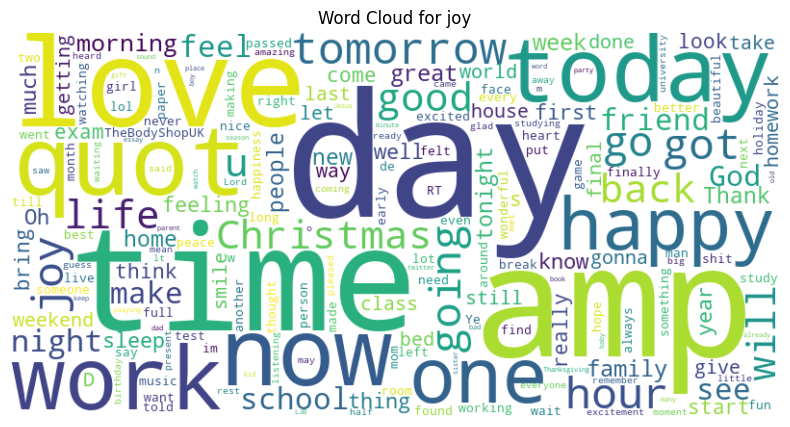

In [ ]:
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(emotion):
    words = ' '.join(df[df['Emotion']==emotion]['Text'].values)
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()

generate_wordcloud("joy")  


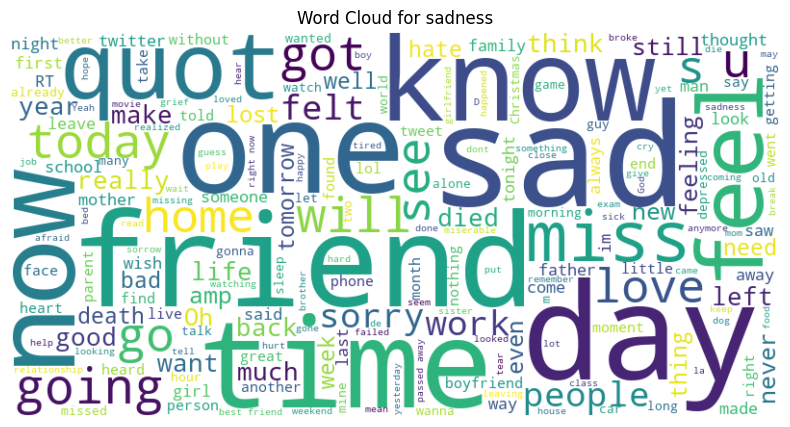

In [17]:
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(emotion):
    words = ' '.join(df[df['Emotion']==emotion]['Text'].values)
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()

generate_wordcloud("sadness")  


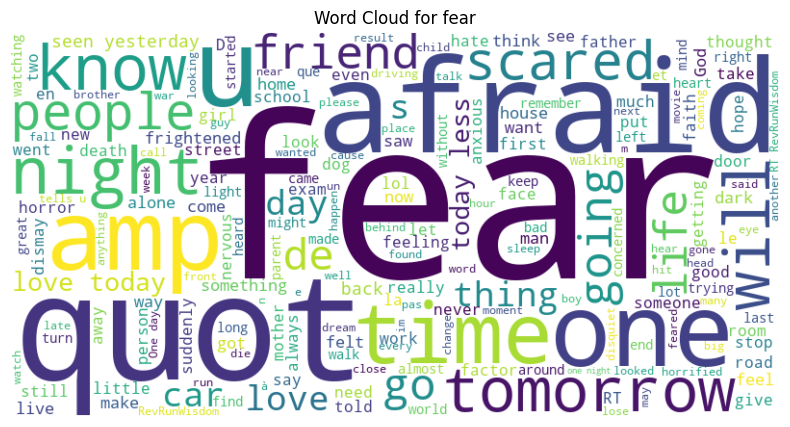

In [18]:
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(emotion):
    words = ' '.join(df[df['Emotion']==emotion]['Text'].values)
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()

generate_wordcloud("fear") 


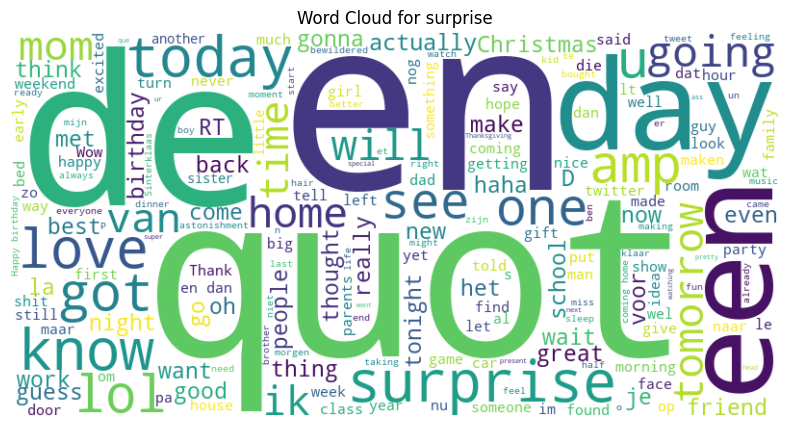

In [19]:
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(emotion):
    words = ' '.join(df[df['Emotion']==emotion]['Text'].values)
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()

generate_wordcloud("surprise")  


### Average Text Length per Emotion


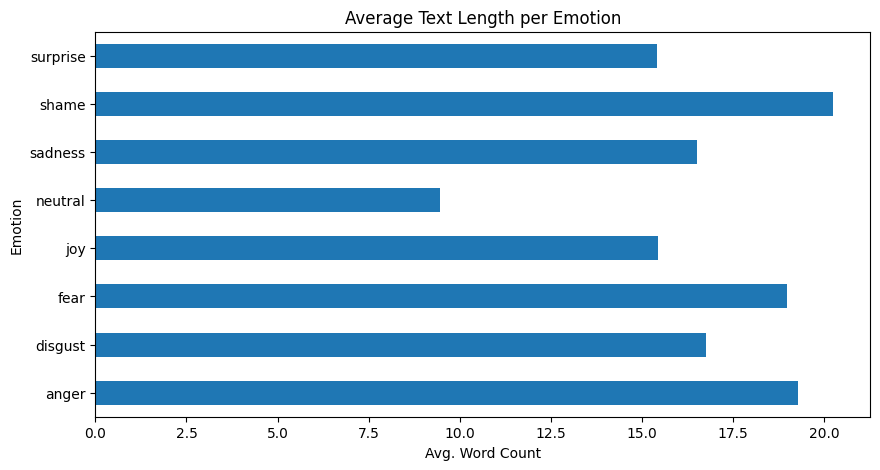

In [20]:
df.groupby('Emotion')['text_length'].mean().plot(kind='barh', figsize=(10, 5))
plt.title("Average Text Length per Emotion")
plt.xlabel("Avg. Word Count")
plt.ylabel("Emotion")
plt.show()


### Text Preprocessing 

In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'[^a-z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

df['clean_text'] = df['Text'].apply(clean_text)
df[['Text', 'clean_text']].head()


,Text,clean_text
0,Why ?,why
1,Sage Act upgrade on my to do list for tommorow.,sage act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,on the way to my homegirl baby funeral man i h...
3,Such an eye ! The true hazel eye-and so brill...,such an eye the true hazel eyeand so brilliant...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz for u babe naa...


In [24]:
df.to_csv("cleaned_emotion_data.csv", index=False)